### 1. One vs All

Ý tưởng của bài toán phân loại nhiều lớp sử dụng Logistic Regression là đưa về bài toán phân loại nhị phân. Điều đó có nghĩa là chúng ta phải thay đổi nhiều lớp về thành 2 lớp. Chúng ta sẽ đặt nhãn cho các nhóm cần phân là 1, còn các nhóm còn lại sẽ là 0.

<img src="images/one-vs-all.png" style="width:50%;height:50%;">

Mặc dù có thể phân loại nhiều nhóm bằng Logistic Regression nhưng kết quả phân loại thường không quá cao và đạt được kỳ vọng như ta mong đợi. Chính vì vậy mà `Softmax Regression` (chúng ta sẽ học ở bài tới) sẽ giúp phân loại nhiều lớp tốt hơn rất nhiều so với việc dùng Logistic Regression.

<img src="images/one-vs-all-3.jpg" style="width:50%;height:50%;">


Nội dung trong phần này sẽ chỉ mang tính tham khảo ! (Phân loại nhiều nhóm bằng Logistic Regresison cực ít được sử dụng trong các bài toán thực tế).

### 2. Phân loại 10 nhóm bộ dữ liệu CIFAR 

Sử dụng One-vs-all logistic regression phân loại 10 nhóm dữ liệu trong bộ dữ liệu CIFAR. Các bạn có thể Download bộ dữ liệu này tại http://www.cs.toronto.edu/~kriz/cifar.html.

Chú ý: Hầu hết các mã code trong phần này sẽ gọi các thư viện được viết sẵn.

In [1]:
# Import thư viện 
import random 
import numpy as np
import matplotlib.pyplot as plt
import CIFAR

%matplotlib inline

#### Nhập dữ liệu và trực quan hoá 

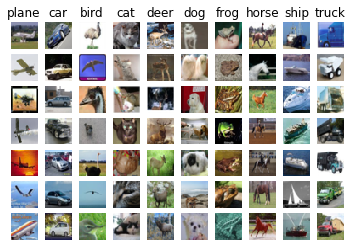

In [2]:
# Tên của 10 nhóm dữ liệu 
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Lấy dữ liệu trong Data 
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = CIFAR.get_CIFAR10_data()

# Trực quan hoá 
CIFAR.visualize_sample(X_train_raw, y_train_raw, classes)

Xử lý dữ liệu và in ra thông tin của dữ liệu

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = CIFAR.preprocessing_CIFAR10_data(X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (3073, 49000)
Train labels shape:  (49000,)
Validation data shape:  (3073, 1000)
Validation labels shape:  (1000,)
Test data shape:  (3073, 10000)
Test labels shape:  (10000,)


#### Thực hiện Train 

Ý tưởng đơn giản là nhóm nào cần phân loại sẽ gán là 1, còn lại sẽ đưa về 0. 
```
y_train_logistic[idxs_i] = 1
y_train_logistic[~idxs_i] = 0
Với idxs_i là nhóm cần phân loại.
```

In [4]:
# train 10 logistic classifier
from algorithms.classifiers import Logistic
from copy import deepcopy

logistic_classifiers = []
num_classes = np.max(y_train) + 1
losses = []
for i in range(num_classes):
    print('\nThe %d/%dth logistic classifier training...' %(i+1, num_classes))
    y_train_logistic = deepcopy(y_train)
    idxs_i = y_train_logistic == i
    y_train_logistic[idxs_i] = 1
    y_train_logistic[~idxs_i] = 0
    logistic = Logistic()
    loss = logistic.train(X_train, y_train_logistic, method='sgd', batch_size=200, learning_rate=1e-6,
              reg = 1e3, num_iters=1000, verbose=True, vectorized=True)
    losses.append(loss)
    logistic_classifiers.append(logistic)


The 1/10th logistic classifier training...
iteration 0/1000: loss 3.244826
iteration 100/1000: loss 2.095855
iteration 200/1000: loss 1.762920
iteration 300/1000: loss 1.554908
iteration 400/1000: loss 1.359422
iteration 500/1000: loss 1.223163
iteration 600/1000: loss 1.107859
iteration 700/1000: loss 1.078361
iteration 800/1000: loss 0.953942
iteration 900/1000: loss 0.907040

The 2/10th logistic classifier training...
iteration 0/1000: loss 3.061871
iteration 100/1000: loss 2.114669
iteration 200/1000: loss 1.726061
iteration 300/1000: loss 1.475758
iteration 400/1000: loss 1.357471
iteration 500/1000: loss 1.169413
iteration 600/1000: loss 1.085825
iteration 700/1000: loss 1.023140
iteration 800/1000: loss 0.925578
iteration 900/1000: loss 0.860494

The 3/10th logistic classifier training...
iteration 0/1000: loss 3.287079
iteration 100/1000: loss 2.104701
iteration 200/1000: loss 1.766594
iteration 300/1000: loss 1.518440
iteration 400/1000: loss 1.383663
iteration 500/1000: loss

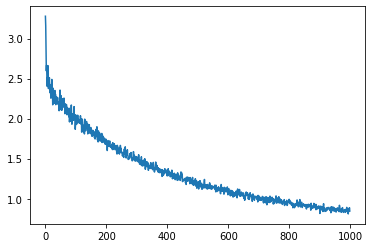

In [5]:
# Vẽ hàm Loss
plt.plot(range(len(losses[9])), losses[9])

#### Dự đoán kết quả sau khi train 

In [6]:
# Tính toán độ chính xác của thuật toán
def predict_one_vs_all(logistic_classifiers, X, num_classes):
    scores = np.zeros((num_classes, X.shape[1]))
    for i in range(num_classes):
        logistic = logistic_classifiers[i]
        scores[i, :] = logistic.predict(X)[1]
    pred_X = np.argmax(scores, axis=0)
    return pred_X

pred_train_one_vs_all = predict_one_vs_all(logistic_classifiers, X_train, num_classes)
pred_val_one_vs_all = predict_one_vs_all(logistic_classifiers, X_val, num_classes)
pred_test_one_vs_all = predict_one_vs_all(logistic_classifiers, X_test, num_classes)
print('Training dataset accuracy: %f' % (np.mean(y_train == pred_train_one_vs_all)))
print('Validation dataset accuracy: %f' % (np.mean(y_val == pred_val_one_vs_all)))
print('Test datast accuracy: %f' % (np.mean(y_test == pred_test_one_vs_all)))

Training dataset accuracy: 0.330837
Validation dataset accuracy: 0.342000
Test datast accuracy: 0.327400


#### Nhận xét 

- Độ chính xác trên tập test thấp (~32%), trong trường hợp xấu có thể chưa đến 10%.
- Nên sử dụng Softmax Regression để đạt hiệu quả cao (các bạn sẽ học về Softmax trong tuần tới).

### Tài liệu tham khảo 

[1] [CS231n: Convolutional Neural Networks for Visual Recognition]()